# Decision Tree Worksheet

In [ ]:
!pip install graphviz
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## Loading data

Load Pima diabetes dataset and split data, with test size 20% and validaton 20%.

In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

data = pd.read_csv(url, names=names)

X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
y_col = 'class'

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

## YOUR CODE HERE

## Creating Model

Make a model using sklearn's DecisionTreeClassifier, with a high max-depth and low minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=20, min_samples_leaf=3)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  93.68635437881873
Validation Accuracy is  69.10569105691057


Make a model with a low max-depth and higher minimum sample leafs.

In [ ]:
## YOUR CODE HERE
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=2, min_samples_leaf=15)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=15)

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE
y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  78.41140529531569
Validation Accuracy is  72.35772357723577


Explain the accuracy results below. 

as max depth increases, the model overfits the data, increasing training accuracy and decreasing validation accuracy

as sample leaves go down, allows for more specific leaves, overfits the data, samme effects as above

## Metrics

Plot the ROC curve and print the AUC of the second model.

Probabilities:
 [1. 0.]

True Value:
 0


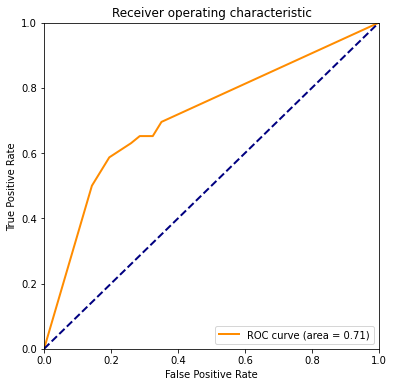

In [ ]:
## YOUR CODE HERE

# Predict class label probabilities
labels = [0,1]
y_val_prob = decision_tree.predict_proba(X_val,labels)

# Output predicted and true values for the first validation point
print('Probabilities:\n',y_val_prob[0])
print('\nTrue Value:\n',y_val.values[0])

# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Use graphviz to visualize your 2nd tree.

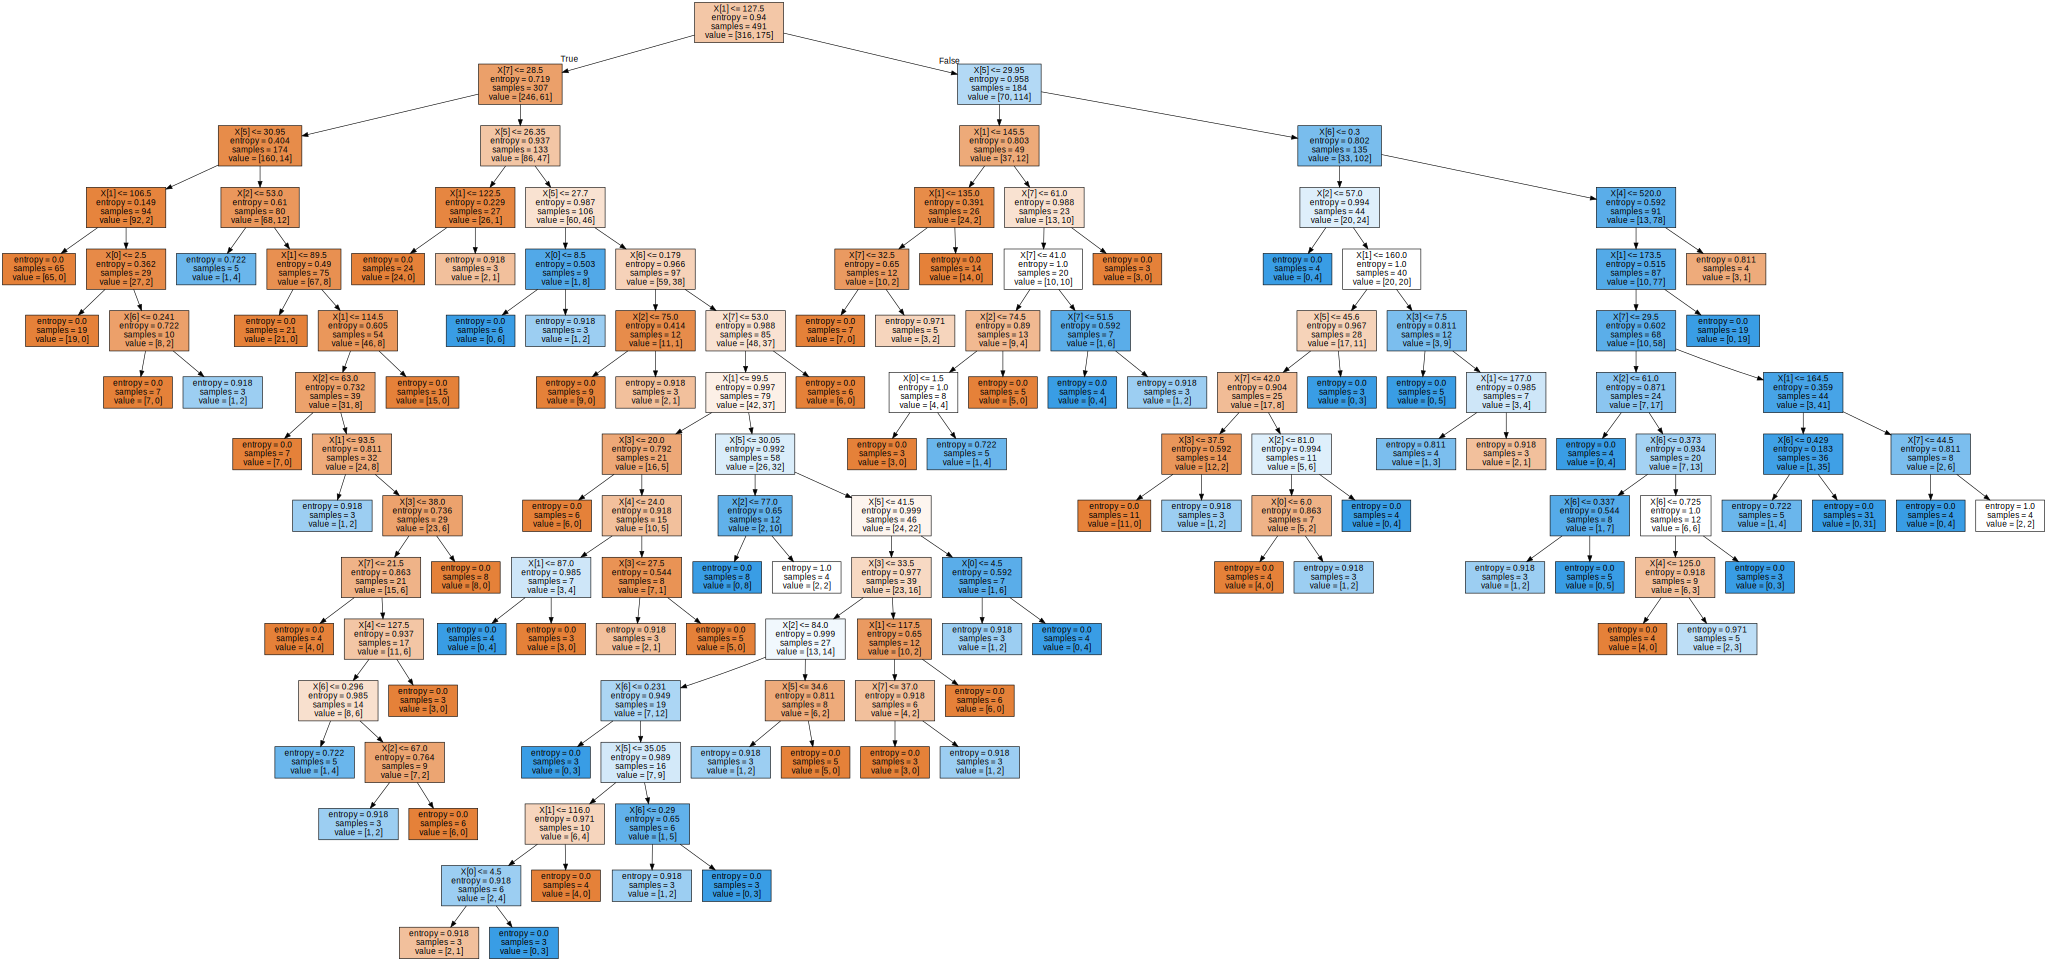

In [ ]:
## YOUR CODE HERE
dot_data = tree.export_graphviz(decision_tree, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

#### Use the graph above to answer the questions below

Question 1: What do you think X[n] represents in the nodes from the graph?

(YOUR ANSWER HERE)
X[n] represents the different features of the data. 

Question 2: What is the root feature? Does it make sense as the root feature?

(YOUR ANSWER HERE)

X[1] = plas

plasma glucose levels

makes sense because blood sugar levels is most confident predictor of diabetes

Question 3: If you were to change the parameters to have a max_depth of 500 and min_samples_leaf of 1, what do you think the effect would be on the test accuracy? Training accuracy?

both would over fit the data --> high training acc low validation acc

**Test your guesses, create a model with max_depth=500 and min_samples_leaf=1, and predict values for the training and validation data**

In [ ]:
## YOUR CODE HERE

decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = None,
                              max_depth=500, min_samples_leaf=1)
decision_tree.fit(X_train, y_train)

y_train_pred=decision_tree.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=decision_tree.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)


Training Accuracy is  100.0
Validation Accuracy is  71.54471544715447


# Random Forest

## Creating Model

Create a model with sklearn's RandomForestClassifier and predict values on your validation set.

In [ ]:
## YOUR CODE HERE

# Creating a model w sklearn's RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

# Training/fitting the model with training data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

Print accuracy of training and validation data.

In [ ]:
## YOUR CODE HERE

y_train_pred=random_forest.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=random_forest.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  76.42276422764228


How did the accuracy compare to the decision tree's accuracy?

both higher

Print the 3 most important features (hint: sklearn has an attribute to help you find these)

In [ ]:
## YOUR CODE HERE
from sklearn.feature_selection import VarianceThreshold
importances = random_forest.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
print(sorted_indices)

for i in sorted_indices:
    print(X_cols[i])

[1 5 7 6 2 0 3 4]
plas
mass
age
pedi
pres
preg
skin
test


Find the accuracy for random forests with 1 to 100 trees, counting by 5. Print and then plot these accuracies.

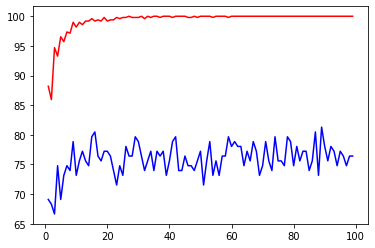

In [ ]:
## YOUR CODE HERE

num = []
train_acc = []
test_acc = []

for i in range(1,100):
    # Creating a model w sklearn's RandomForestClassifier
    random_forest = RandomForestClassifier(n_estimators=i)

    # Training/fitting the model with training data
    random_forest.fit(X_train, y_train)

    y_train_pred=random_forest.predict(X_train)
    train_acc.append( accuracy_score(y_train, y_train_pred)*100)
    y_val_pred=random_forest.predict(X_val)
    test_acc.append(accuracy_score(y_val,y_val_pred)*100)

    num.append(i)
    i+=5

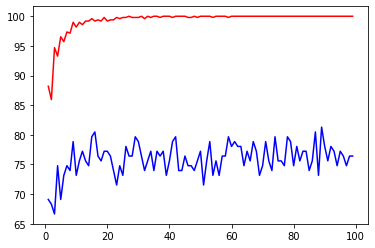

In [ ]:
plt.plot(num, train_acc, "r-", num, test_acc, "b-")

Plot the roc_curve using predict_proba a function for our random forest model, and metrics.roc_curve

It might help to google these functions and look at sklearn's documentation.

Probabilities:
 [0.75757576 0.24242424]

True Value:
 0


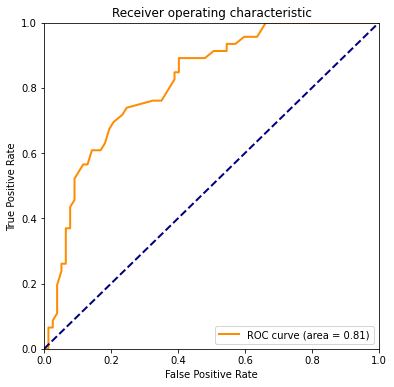

In [ ]:
## YOUR CODE HERE

## YOUR CODE HERE

# Predict class label probabilities
labels = [0,1]
y_val_prob = random_forest.predict_proba(X_val)

# Output predicted and true values for the first validation point
print('Probabilities:\n',y_val_prob[0])
print('\nTrue Value:\n',y_val.values[0])

# Calculate the FPR and TPR at varying thresholds (assume label 1 is the "postive" class)
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob[:,1])

# Calculate the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=937aabd8-b755-4949-a91c-305bf1afbf2a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>